## UStacky Capstone Project Redo

### The data was recorded between January 2020 to March 2023 (Record discontinued due to reclassification)


### The Ustacky Capstone Project was redone Due to:
* The data was not yielding correct output with concate as the row was found to merge different countries
* As such, the dash format was tested but my PC did not have memory size to complete it.
* I tried using MySQL but was getting a 1290 error about secure file priv. The load wizard was still loading one file after 24hours.
* The data had earlier being  transformed in Excel to unpivot the dates; and was taken back to merge in excel transform.
* The merge data 'csse_covid19_confirmed_death_recovered' is now read back to complete the project.
* To see the datasets, please check the files uploaded on Github 'https://github.com/PaulaGweke/Ustacky_CapProject/'

In [141]:
import requests
import numpy as np
import urllib.request
from urllib import request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import glob

## SECTION 1 - ANALYSING THE JOHN HOPSKINS UNIVERSITY GITHUB DATA

In [146]:
df_csse = pd.read_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\csse_covid19_confirmed_death_recovered.csv')

In [121]:
df_csse.head(2)

,Country,Lat,Long,Date,Confirmed,Death,Recovered
0,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0
1,Afghanistan,33.93911,67.709953,1/23/2020,0,0,0


In [267]:
#Transform the date to datetime 
df_csse['Date'] = pd.to_datetime(df_csse['Date'])

In [268]:
#Copy Date into Date_save as it sometimes is lost after metlab plots
df_csse['Date_save'] = df_csse['Date']

In [124]:
df_csse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302630 entries, 0 to 302629
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    302630 non-null  object        
 1   Lat        302630 non-null  float64       
 2   Long       302630 non-null  float64       
 3   Date       302630 non-null  datetime64[ns]
 4   Confirmed  302630 non-null  int64         
 5   Death      302630 non-null  int64         
 6   Recovered  302630 non-null  int64         
 7   Date_save  302630 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 18.5+ MB


In [125]:
df_csse.describe()

,Lat,Long,Confirmed,Death,Recovered
count,302630.000000,302630.000000,3.026300e+05,3.026300e+05,3.026300e+05
mean,18.319694,27.048260,1.008979e+06,1.443335e+04,7.659768e+04
std,25.377902,75.226011,5.009309e+06,6.657375e+04,7.154313e+05
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,-1.000000e+00
25%,3.933900,-9.429499,8.210000e+02,4.000000e+00,0.000000e+00
50%,19.195900,23.347000,1.575350e+04,1.680000e+02,0.000000e+00
75%,39.074200,90.433600,2.564145e+05,3.394000e+03,9.360000e+02
max,71.706900,178.065000,1.037558e+08,1.123246e+06,3.097475e+07


In [126]:
df_csse.shape

(302630, 8)

### The Cases counts (Confirmed, Death and Recovered) are cummulative sum from previous Date
#### Plots of the trend of the cummulative sum over year are shown in area plots below

<AxesSubplot:title={'center':'Fig 3: Global Recovery Trend'}, xlabel='Date'>

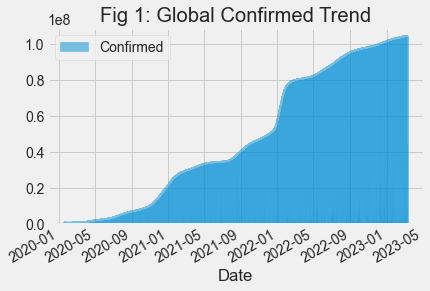

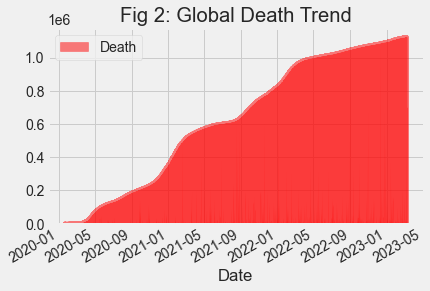

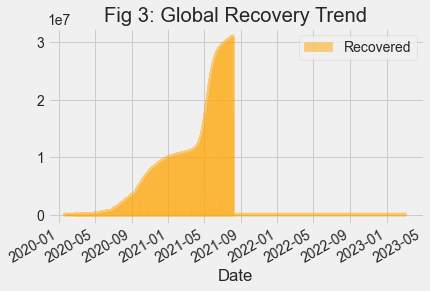

In [271]:
df_csse.plot.area( x='Date', y = 'Confirmed', title = 'Fig 1: Global Confirmed Trend', stacked = False)
df_csse.plot.area( x='Date', y = 'Death', title = 'Fig 2: Global Death Trend', stacked = False, color='red')
df_csse.plot.area( x='Date', y = 'Recovered', title = 'Fig 3: Global Recovery Trend', stacked = False, color='orange')

<Figure size 2880x432 with 0 Axes>

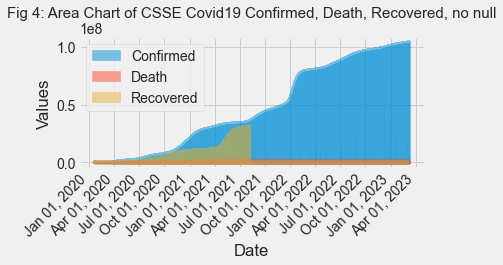

In [128]:


# df_csse['Date'] = df_csse['Date_save'] -- If Date is lost

# Set the Date column as the index
df_csse.set_index('Date', inplace=True)

# Select columns for y-values
y_columns = ['Confirmed', 'Death', 'Recovered']

# Plotting using df.plot.area()
plt.figure(figsize=(40, 6))
df_csse[y_columns].plot.area(stacked=False)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Fig 4: Area Chart of CSSE Covid19 Confirmed, Death, Recovered, no null', fontsize=15, y=1.1) #to add space before plot
plt.xticks(rotation=45)

# Format the date ticks on the x-axis (for a specific date format)
date_format = '%b %d, %Y'  # Example: Jan 01, 2023
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=[1, 4, 7, 10]))  # Show ticks every quarter

plt.tight_layout()

# Display the plot
plt.show()


### To get daily count, we creat new columns where the difference between from previous date will be estimated
#### Make plots from the sum of daily record calculated

In [28]:
df_csse.head(2)

,Country,Lat,Long,Confirmed,Death,Recovered,Date_save
Date,,,,,,,
2020-01-22,Afghanistan,33.93911,67.709953,0,0,0,2020-01-22
2020-01-23,Afghanistan,33.93911,67.709953,0,0,0,2020-01-23


In [29]:
# create headers for calculating daily differences

df_csse['Confirmed_new'], df_csse['Death_new'], df_csse['Recovered_new']=0, 0, 0;

In [39]:
df_csse.head(2)

,Country,Lat,Long,Confirmed,Death,Recovered,Date_save,Confirmed_new,Death_new,Recovered_new
Date,,,,,,,,,,
2020-01-22,Afghanistan,33.93911,67.709953,0,0,0,2020-01-22,0,0,0
2020-01-23,Afghanistan,33.93911,67.709953,0,0,0,2020-01-23,0,0,0


In [35]:
# Save and read back data due to KeyErrors generated in calculation
df_csse.to_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\csse_covid19_confirmed_death_recovered_rb.csv', index=False)

In [42]:
# Readback save process
df_csse2 = pd.read_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\csse_covid19_confirmed_death_recovered_rb.csv')

In [43]:
df_csse2.head(2)

,Country,Lat,Long,Confirmed,Death,Recovered,Date_save,Confirmed_new,Death_new,Recovered_new
0,Afghanistan,33.93911,67.709953,0,0,0,2020-01-22,0,0,0
1,Afghanistan,33.93911,67.709953,0,0,0,2020-01-23,0,0,0


In [44]:
#Transform the date to datetime 
df_csse2['Date'] = pd.to_datetime(df_csse2['Date_save'])
df_csse2['Date_save'] = pd.to_datetime(df_csse2['Date_save'])

In [45]:
df_csse2.head(2)

,Country,Lat,Long,Confirmed,Death,Recovered,Date_save,Confirmed_new,Death_new,Recovered_new,Date
0,Afghanistan,33.93911,67.709953,0,0,0,2020-01-22,0,0,0,2020-01-22
1,Afghanistan,33.93911,67.709953,0,0,0,2020-01-23,0,0,0,2020-01-23


In [46]:
#calculate difference between subsequent data to get true count of confirmed, death and recovered cases
for i in range(1, len(df_csse)):
    if df_csse2.loc[i, 'Lat'] != 0 and df_csse2.loc[i, 'Lat'] == df_csse2.loc[i - 1, 'Lat']:
        df_csse2.loc[i, 'Confirmed_new'] = df_csse2.loc[i, 'Confirmed'] - df_csse2.loc[i - 1, 'Confirmed']
    else:
        df_csse2.loc[i, 'Confirmed_new'] = df_csse2.loc[i, 'Confirmed']

In [47]:
#calculate difference between subsequent data to get true count of confirmed, death and recovered cases
for i in range(1, len(df_csse)):
    if df_csse2.loc[i, 'Lat'] != 0 and df_csse2.loc[i, 'Lat'] == df_csse2.loc[i - 1, 'Lat']:
        df_csse2.loc[i, 'Death_new'] = df_csse2.loc[i, 'Death'] - df_csse2.loc[i - 1, 'Death']
    else:
        df_csse2.loc[i, 'Death_new'] = df_csse2.loc[i, 'Death']

In [48]:
#calculate difference between subsequent data to get true count of confirmed, death and recovered cases
for i in range(1, len(df_csse)):
    if df_csse2.loc[i, 'Lat'] != 0 and df_csse2.loc[i, 'Lat'] == df_csse2.loc[i - 1, 'Lat']:
        df_csse2.loc[i, 'Recovered_new'] = df_csse2.loc[i, 'Recovered'] - df_csse2.loc[i - 1, 'Recovered']
    else:
        df_csse2.loc[i, 'Recovered_new'] = df_csse2.loc[i, 'Recovered']

In [49]:
#remove any sporious negative values
for i in range(len(df_csse2)):
    if df_csse2.loc[i, 'Death_new'] < 0:
        df_csse2.loc[i, 'Death_new'] = 0

In [50]:
for i in range(len(df_csse2)):
    if df_csse2.loc[i, 'Confirmed_new'] < 0:
        df_csse2.loc[i, 'Confirmed_new'] = 0

In [51]:
for i in range(len(df_csse2)):
    if df_csse2.loc[i, 'Recovered_new'] < 0:
        df_csse2.loc[i, 'Recovered_new'] = 0

In [52]:
# If Confirmed count is less than death count, the count is unreliable and set to zero, inner join used in merge so no null value expected
for i in range(len(df_csse2)):
    if df_csse2.loc[i, 'Confirmed'] <  df_csse2.loc[i, 'Death']:
        df_csse2.loc[i, 'Death_new'] = 0

In [57]:
#remove rows with any null value
df_csse2 = df_csse2.dropna()

In [58]:
# Save new file to folder 
df_csse2.to_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\csse_covid19_confirmed_death_recovered_daily.csv', index=False)

In [59]:
df_csse2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302630 entries, 0 to 302629
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Country        302630 non-null  object        
 1   Lat            302630 non-null  float64       
 2   Long           302630 non-null  float64       
 3   Confirmed      302630 non-null  int64         
 4   Death          302630 non-null  int64         
 5   Recovered      302630 non-null  int64         
 6   Date_save      302630 non-null  datetime64[ns]
 7   Confirmed_new  302630 non-null  int64         
 8   Death_new      302630 non-null  int64         
 9   Recovered_new  302630 non-null  int64         
 10  Date           302630 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(6), object(1)
memory usage: 25.4+ MB


In [60]:
df_csse2.describe()

,Lat,Long,Confirmed,Death,Recovered,Confirmed_new,Death_new,Recovered_new
count,302630.000000,302630.000000,3.026300e+05,3.026300e+05,3.026300e+05,3.026300e+05,302630.000000,3.026300e+05
mean,18.319694,27.048260,1.008979e+06,1.443335e+04,7.659768e+04,2.123435e+03,22.513069,4.499175e+02
std,25.377902,75.226011,5.009309e+06,6.657375e+04,7.154313e+05,1.494512e+04,177.880622,5.475616e+03
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.933900,-9.429499,8.210000e+02,4.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
50%,19.195900,23.347000,1.575350e+04,1.680000e+02,0.000000e+00,3.000000e+00,0.000000,0.000000e+00
75%,39.074200,90.433600,2.564145e+05,3.394000e+03,9.360000e+02,2.450000e+02,2.000000,0.000000e+00
max,71.706900,178.065000,1.037558e+08,1.123246e+06,3.097475e+07,1.354505e+06,59895.000000,1.123456e+06


In [61]:
df_csse2.shape

(302630, 11)

### Plot daily Measurements

<AxesSubplot:xlabel='Date'>

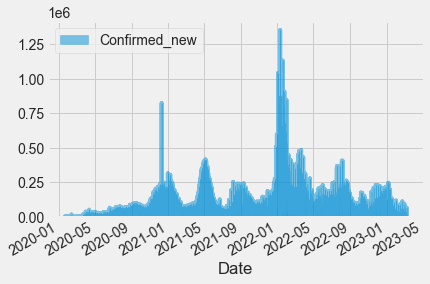

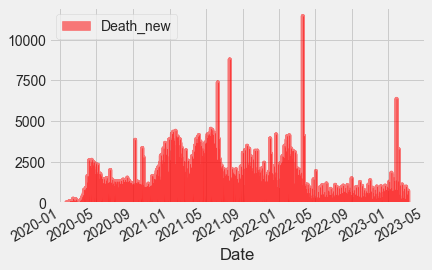

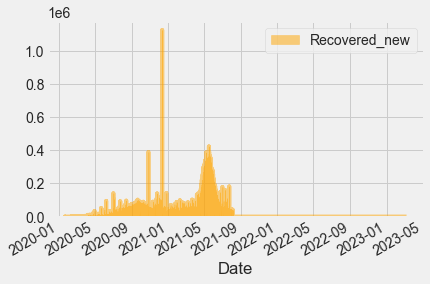

In [272]:
df_csse2.plot.area( x='Date', y = 'Confirmed_new', stacked = False)
df_csse2.plot.area( x='Date', y = 'Death_new', stacked = False, color='red')
df_csse2.plot.area( x='Date', y = 'Recovered_new', stacked = False, color='orange')

In [64]:
# The High death in year 2023 does not look reliable. Qc of the largest numbers to be used to determine whether to set to zero

df_csse2.nlargest(10, 'Death_new')

,Country,Lat,Long,Confirmed,Death,Recovered,Date_save,Confirmed_new,Death_new,Recovered_new,Date
83313,China,31.592700,88.00000,1521816,59895,0,2023-01-15,0,59895,0,2023-01-15
83319,China,31.592700,88.00000,1521816,72553,0,2023-01-21,0,12658,0,2023-01-21
48753,Chile,-35.675100,-71.54300,3401145,55965,0,2022-03-21,8167,11447,0,2022-03-21
106751,Ecuador,-1.831200,-78.18340,477946,30744,443880,2021-07-20,1634,8786,0,2021-07-20
150107,India,20.593684,78.96288,29274823,363079,27790073,2021-06-10,92291,7374,134580,2021-06-10
83326,China,31.592700,88.00000,1521816,78917,0,2023-01-28,0,6364,0,2023-01-28
150084,India,20.593684,78.96288,25496330,283248,21986363,2021-05-18,267334,4529,389851,2021-05-18
150089,India,20.593684,78.96288,26752447,303720,23728011,2021-05-23,222315,4454,302544,2021-05-23
271018,US,40.000000,-100.00000,24627164,411457,0,2021-01-20,187668,4405,0,2021-01-20
271010,US,40.000000,-100.00000,23040116,385969,0,2021-01-12,222416,4349,0,2021-01-12


In [65]:
# The top 2 results coming from 2023 will be rejected because the lat and longitude 
# were filled manually and could have cause the error. Others will be accepted
for i in range(len(df_csse2)):
    if df_csse2.loc[i, 'Death_new'] > 12000:
        df_csse2.loc[i, 'Death_new'] = 0


In [66]:
# Save updated file new file to folder 
df_csse2.to_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\csse_covid19_confirmed_death_recovered_daily_updated.csv', index=False)

In [67]:
# Rerun check for top 10 largest daily death records
df_csse2.nlargest(10, 'Death_new')

,Country,Lat,Long,Confirmed,Death,Recovered,Date_save,Confirmed_new,Death_new,Recovered_new,Date
48753,Chile,-35.675100,-71.54300,3401145,55965,0,2022-03-21,8167,11447,0,2022-03-21
106751,Ecuador,-1.831200,-78.18340,477946,30744,443880,2021-07-20,1634,8786,0,2021-07-20
150107,India,20.593684,78.96288,29274823,363079,27790073,2021-06-10,92291,7374,134580,2021-06-10
83326,China,31.592700,88.00000,1521816,78917,0,2023-01-28,0,6364,0,2023-01-28
150084,India,20.593684,78.96288,25496330,283248,21986363,2021-05-18,267334,4529,389851,2021-05-18
150089,India,20.593684,78.96288,26752447,303720,23728011,2021-05-23,222315,4454,302544,2021-05-23
271018,US,40.000000,-100.00000,24627164,411457,0,2021-01-20,187668,4405,0,2021-01-20
271010,US,40.000000,-100.00000,23040116,385969,0,2021-01-12,222416,4349,0,2021-01-12
150083,India,20.593684,78.96288,25228996,278719,21596512,2021-05-17,263533,4329,422436,2021-05-17
190068,Mexico,23.634500,-102.55280,2420659,227840,1930608,2021-06-01,6917,4272,2141,2021-06-01


<AxesSubplot:title={'center':'Fig 10: Global Recovered_new Trend'}, xlabel='Date'>

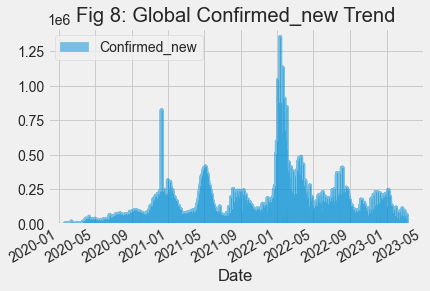

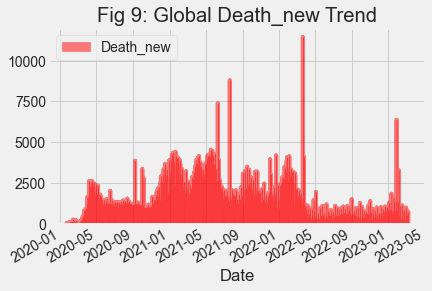

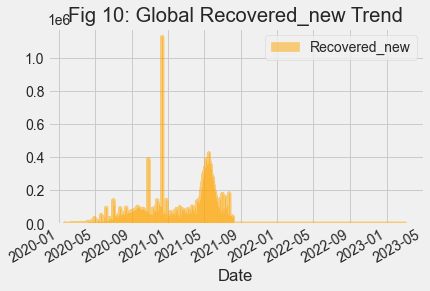

In [273]:
# Replot Area Plots
df_csse2.plot.area( x='Date', y = 'Confirmed_new', title = 'Fig 8: Global Confirmed_new Trend',  stacked = False)
df_csse2.plot.area( x='Date', y = 'Death_new', title = 'Fig 9: Global Death_new Trend',  stacked = False, color='red')
df_csse2.plot.area( x='Date', y = 'Recovered_new', title = 'Fig 10: Global Recovered_new Trend',  stacked = False, color='orange')

In [69]:
df_csse2.sum()

Country          AfghanistanAfghanistanAfghanistanAfghanistanAf...
Lat                                                 5544088.899292
Long                                                8185614.793612
Confirmed                                             305347375396
Death                                                   4367964989
Recovered                                              23180755287
Confirmed_new                                            642615274
Death_new                                                  6740577
Recovered_new                                            136158541
dtype: object

In [71]:
df_csse2['Year'] = df_csse2['Date'].dt.year

In [72]:
df_csse2.head(2)

,Country,Lat,Long,Confirmed,Death,Recovered,Date_save,Confirmed_new,Death_new,Recovered_new,Date,Year
0,Afghanistan,33.93911,67.709953,0,0,0,2020-01-22,0,0,0,2020-01-22,2020
1,Afghanistan,33.93911,67.709953,0,0,0,2020-01-23,0,0,0,2020-01-23,2020


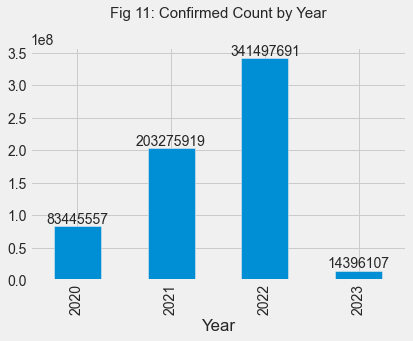

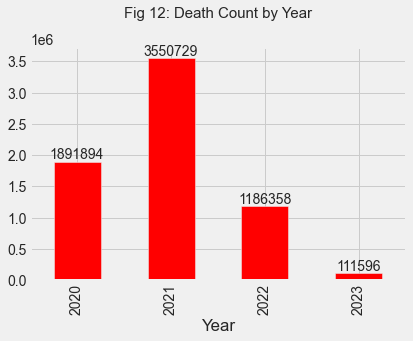

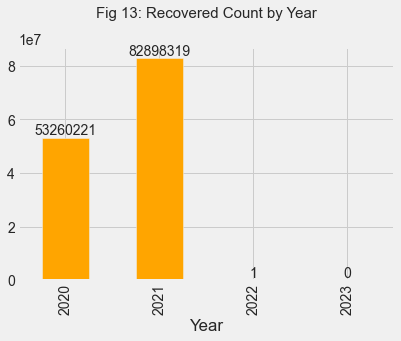

In [277]:

# Bar plot of Confirmed, Death and Recovered counts by year

grouped_data = df_csse2.groupby(['Year'])['Confirmed_new'].sum()
ax = grouped_data.plot.bar()
plt.title('Fig 11: Confirmed Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()


grouped_data = df_csse2.groupby(['Year'])['Death_new'].sum()
ax = grouped_data.plot.bar(color='red')
plt.title('Fig 12: Death Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()


grouped_data = df_csse2.groupby(['Year'])['Recovered_new'].sum()
ax = grouped_data.plot.bar(color='orange')
plt.title('Fig 13: Recovered Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()



### From The 'recovered_new' plot (Fig10) and the 'Recovered Count (Fig 13) by year' plot, 
* ### it appears recovering counts were discontinues sometime around late Aughes to Early September 2021

* #### Peak Confirmed cases were in 2022 with 341.4M of 642.6M cases recored
* #### Peak Death cases were in 2021 with 3.55M cases of the total 6.7M cases recorded
* #### Recovery trend show increase over years for the two years recorded

<Figure size 720x216 with 0 Axes>

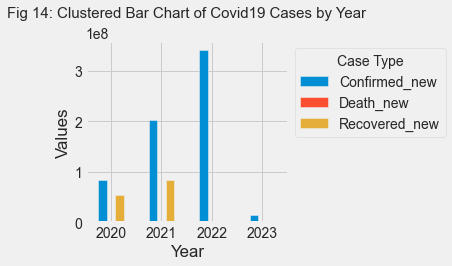

In [131]:

# To group by year and sum the Confirmed, Deaths, and Recovered columns
df_grouped = df_csse2.groupby('Year')['Confirmed_new', 'Death_new', 'Recovered_new'].sum()

# Plotting clustered bars
plt.figure(figsize=(10, 3))
ax = df_grouped.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Fig 14: Clustered Bar Chart of Covid19 Cases by Year', fontsize=15, y=1.1)
plt.xticks(rotation=0)

# To move the legend outside the plot using bbox_to_anchor
legend = ax.legend(title='Case Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

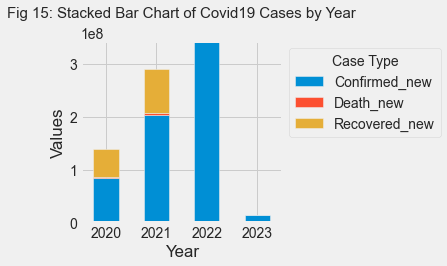

In [132]:

# To group by year and sum the Confirmed, Deaths, and Recovered columns
df_grouped = df_csse2.groupby('Year')['Confirmed_new', 'Death_new', 'Recovered_new'].sum()

# Plotting stacked bars
plt.figure(figsize=(10, 6))
ax = df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Fig 15: Stacked Bar Chart of Covid19 Cases by Year', fontsize=15, y=1.1)
plt.xticks(rotation=0)

# To move the legend outside the plot using bbox_to_anchor
legend = ax.legend(title='Case Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


### Top 10 and Bottom 10 countries based on counts of Confirmed

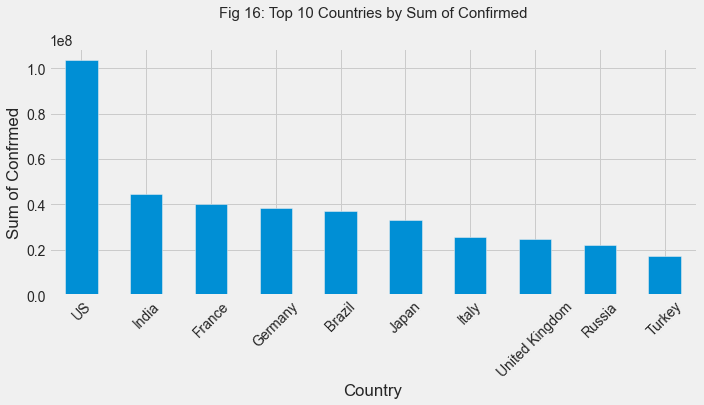

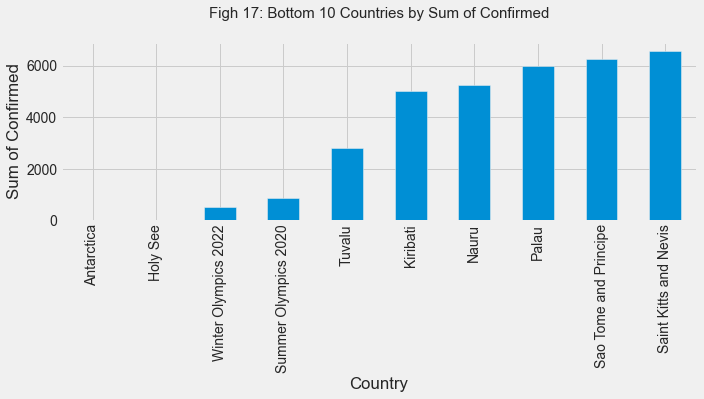

In [133]:


# To group by country and sum the Deaths column
df_grouped = df_csse2.groupby('Country')['Confirmed_new'].sum()

# To sort the grouped data by the sum of Deaths in descending order
df_sorted = df_grouped.sort_values(ascending=False)

# Get the top 10 countries
top_10 = df_sorted.head(10)

# Plotting top 10 countries by sum of deaths
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Sum of Confrmed')
plt.title('Fig 16: Top 10 Countries by Sum of Confirmed', fontsize=15, y=1.1)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()




# To group by country and sum the Deaths column
df_grouped = df_csse2.groupby('Country')['Confirmed_new'].sum()

# To sort the grouped data by the sum of Deaths in descending order
df_sorted = df_grouped.sort_values(ascending=True)

# Get the top 10 countries
bottom_10 = df_sorted.head(10)

# Plotting top 10 countries by sum of deaths
plt.figure(figsize=(10, 6))
ax = bottom_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Sum of Confirmed')
plt.title('Figh 17: Bottom 10 Countries by Sum of Confirmed', fontsize=15, y=1.1)
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


### Top 10 and Bottom 10 countries based on counts of Death

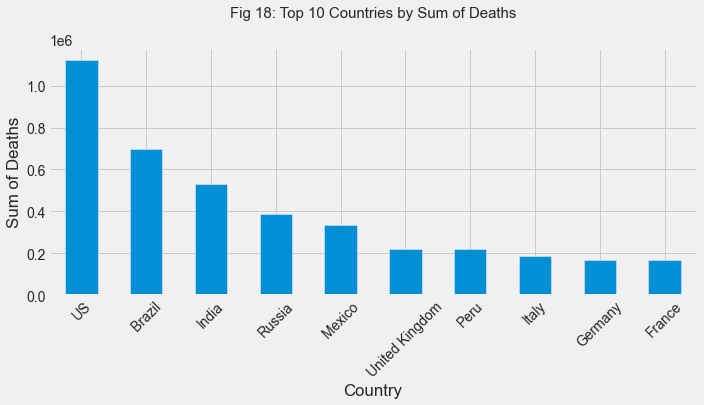

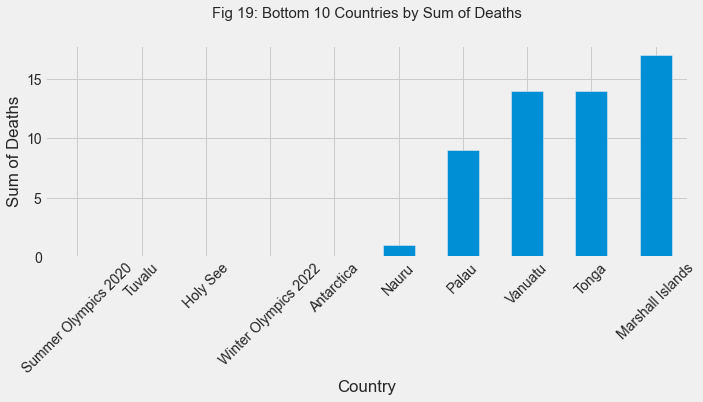

In [134]:


# To group by country and sum the Deaths column
df_grouped = df_csse2.groupby('Country')['Death_new'].sum()

# To sort the grouped data by the sum of Deaths in descending order
df_sorted = df_grouped.sort_values(ascending=False)

# Get the top 10 countries
top_10 = df_sorted.head(10)

# Plotting top 10 countries by sum of deaths
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Sum of Deaths')
plt.title('Fig 18: Top 10 Countries by Sum of Deaths', fontsize=15, y=1.1)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()




# To group by country and sum the Deaths column
df_grouped = df_csse2.groupby('Country')['Death_new'].sum()

# To sort the grouped data by the sum of Deaths in descending order
df_sorted = df_grouped.sort_values(ascending=True)

# Get the top 10 countries
bottom_10 = df_sorted.head(10)

# Plotting top 10 countries by sum of deaths
plt.figure(figsize=(10, 6))
ax = bottom_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Sum of Deaths')
plt.title('Fig 19: Bottom 10 Countries by Sum of Deaths', fontsize=15, y=1.1)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


## SECTION 2 - ANALYSING THE JOHN HOPSKINS UNIVERSITY GITHUB DATA FOR NIGERIA

### Extract Nigeria Record and plot trend and Daily charts

In [114]:
df_csse_nig = df_csse2.groupby(['Country']).get_group("Nigeria")

In [115]:
df_csse_nig.head(2)

,Country,Lat,Long,Confirmed,Death,Recovered,Date_save,Confirmed_new,Death_new,Recovered_new,Date,Year
211270,Nigeria,9.082,8.6753,0,0,0,2020-01-22,0,0,0,2020-01-22,2020
211271,Nigeria,9.082,8.6753,0,0,0,2020-01-23,0,0,0,2020-01-23,2020


<AxesSubplot:title={'center':'Fig 21: Nigeria Death Trend'}, xlabel='Date'>

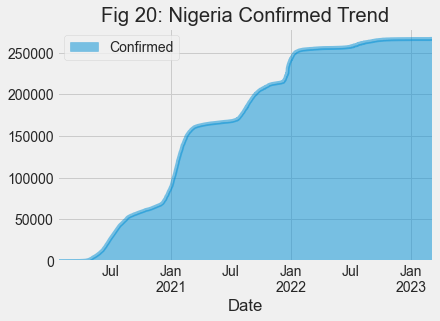

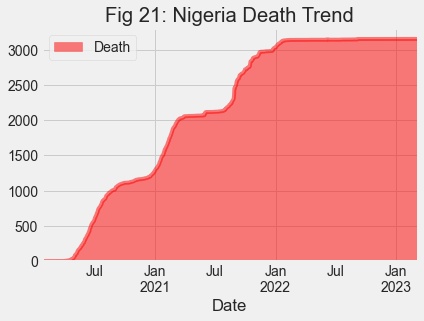

In [261]:
df_csse_nig.plot.area( x='Date', y = 'Confirmed', title = 'Fig 20: Nigeria Confirmed Trend', stacked = False)
df_csse_nig.plot.area( x='Date', y = 'Death', title = 'Fig 21: Nigeria Death Trend', stacked = False, color='red')


<AxesSubplot:title={'center':'Fig 23: Nigeria Death New Trend'}, xlabel='Date'>

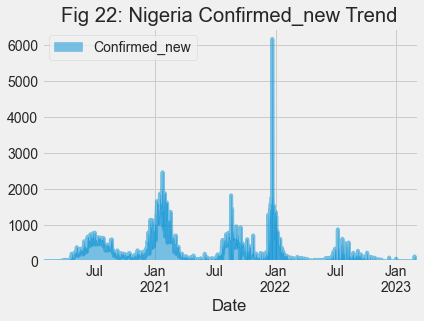

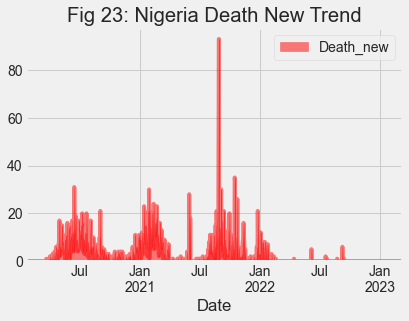

In [262]:
df_csse_nig.plot.area( x='Date', y = 'Confirmed_new', title = 'Fig 22: Nigeria Confirmed_new Trend', stacked = False)
df_csse_nig.plot.area( x='Date', y = 'Death_new', title = 'Fig 23: Nigeria Death New Trend', stacked = False, color='red')

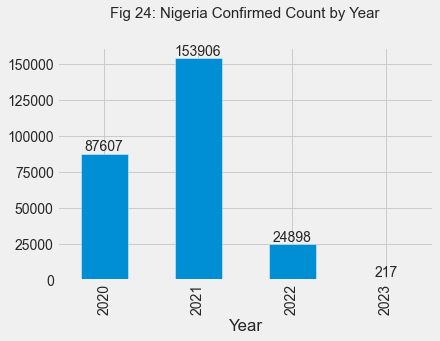

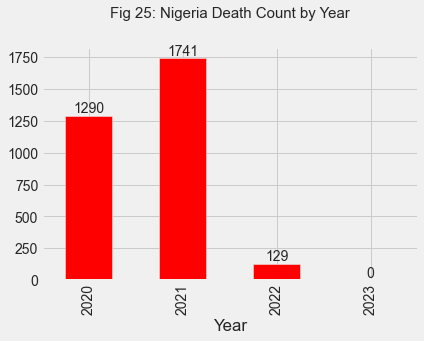

In [278]:

# Bar plot of Confirmed, Death and Recovered counts by year

grouped_data = df_csse_nig.groupby(['Year'])['Confirmed_new'].sum()
ax = grouped_data.plot.bar()
plt.title('Fig 24: Nigeria Confirmed Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()


grouped_data = df_csse_nig.groupby(['Year'])['Death_new'].sum()
ax = grouped_data.plot.bar(color='red')
plt.title('Fig 25: Nigeria Death Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()


In [138]:
df_csse_nig.sum()

Country          NigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNige...
Lat                                                      10371.644
Long                                                     9907.1926
Confirmed                                                188033526
Death                                                      2398966
Recovered                                                 39492087
Confirmed_new                                               266628
Death_new                                                     3160
Recovered_new                                               165208
Year                                                       2308136
dtype: object

* #### From the plots Total recorded Death in Nigeria is 3,160 with highest count of 1,741 recorded in 2021
* #### Total Confirmed cases were 266,628

## SECTION 3 - COMPARE JHU AND WHO DATA

### Read in WHO Record to compare trend and daily sum plots

In [149]:
df_who = pd.read_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\who_covid19_global_data_cleaned2.csv')

In [152]:
#Transform the date to datetime and copy 
df_who['Date'] = pd.to_datetime(df_who['Date'])
df_who['Date_save'] = df_who['Date']

In [180]:
df_who['Year'] = df_who['Date'].dt.year

In [181]:
df_who.head(2)

,Country,Date,Confirmed_new,Confirmed,Death_new,Death,Date_save,Year
0,Afghanistan,2020-01-03,0,0,0,0,2020-01-03,2020
1,Afghanistan,2020-01-04,0,0,0,0,2020-01-04,2020


### John Hopskin (CSSE) Confirmed Trend Vs WHO Confirmed Trend

<AxesSubplot:title={'center':'Fig 25b: WHO Confirmed Trend'}, xlabel='Date'>

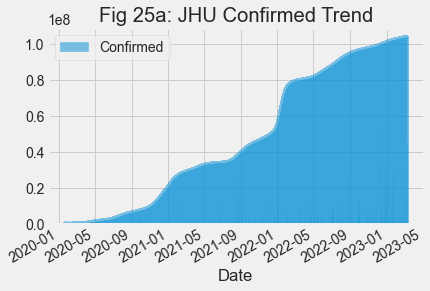

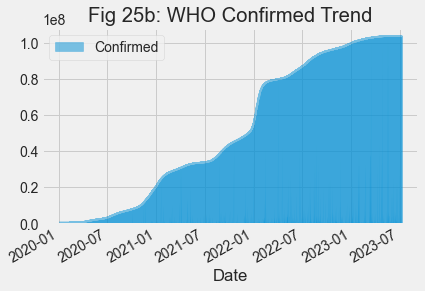

In [185]:
df_csse2.plot.area( x='Date', y = 'Confirmed', title = 'Fig 25a: JHU Confirmed Trend', stacked = False)
df_who.plot.area( x='Date', y = 'Confirmed', title = 'Fig 25b: WHO Confirmed Trend', stacked = False)

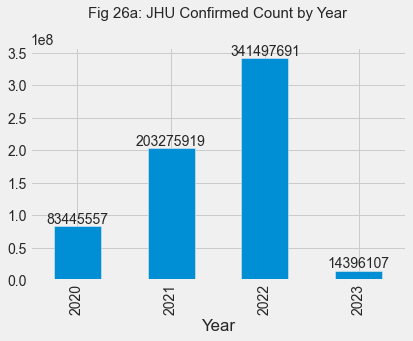

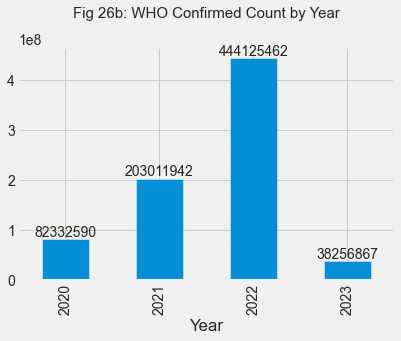

In [186]:

# Compare JHU and WHO record on Bar plot of Confirmed, Death counts by year

grouped_data = df_csse2.groupby(['Year'])['Confirmed_new'].sum()
ax = grouped_data.plot.bar()
plt.title('Fig 26a: JHU Confirmed Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()


grouped_data = df_who.groupby(['Year'])['Confirmed_new'].sum()
ax = grouped_data.plot.bar()
plt.title('Fig 26b: WHO Confirmed Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()


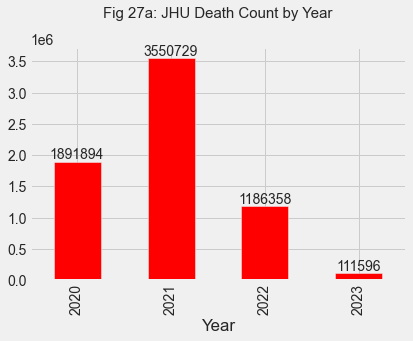

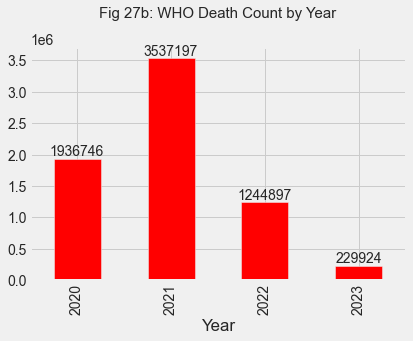

In [279]:

# Compare JHU and WHO record on Bar plot of Confirmed, Death counts by year

grouped_data = df_csse2.groupby(['Year'])['Death_new'].sum()
ax = grouped_data.plot.bar(color='red')
plt.title('Fig 27a: JHU Death Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()


grouped_data = df_who.groupby(['Year'])['Death_new'].sum()
ax = grouped_data.plot.bar(color='red')
plt.title('Fig 27b: WHO Death Count by Year', fontsize=15, y=1.1)
for i, value in enumerate(grouped_data):
    ax.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,3), ha='center')

plt.show()


In [155]:
df_csse2.sum()

Country          AfghanistanAfghanistanAfghanistanAfghanistanAf...
Lat                                                 5544088.899292
Long                                                8185614.793612
Confirmed                                             305347375396
Death                                                   4367964989
Recovered                                              23180755287
Confirmed_new                                            642615274
Death_new                                                  6740577
Recovered_new                                            136158541
Year                                                     611656040
dtype: object

In [156]:
df_who.sum()

Country          AfghanistanAfghanistanAfghanistanAfghanistanAf...
Confirmed_new                                            767726861
Confirmed                                             411374322313
Death_new                                                  6948764
Death                                                   5251192907
dtype: object

* ### Total JHU death count is 6,740,577 while that of WHO is 6,948,764 
* ### Total JHU Confirmed count is 642,615,274 while that of WHO is 767,726,861
* ### The difference is mostly from 2022 records as seen in Figures 26 and 27 comparison


In [160]:
Death_rec_diff = df_who['Death_new'].sum() - df_csse2['Death_new'].sum()

In [161]:
Confirmed_rec_diff = df_who['Confirmed_new'].sum() - df_csse2['Confirmed_new'].sum()

In [176]:
print('WHO Death records is higher than JHU Death records by', Death_rec_diff)

WHO Death records is higher than JHU Death records by 208187


In [178]:
print('WHO Death records is higher than JHU Death records by ' + format(df_who['Death_new'].sum() - df_csse2['Death_new'].sum()))

WHO Death records is higher than JHU Death records by 208187


In [179]:
print('WHO Confirmed records is higher than JHU Death records by', Confirmed_rec_diff)

WHO Confirmed records is higher than JHU Death records by 125111587


In [188]:
df_who_nig = df_who.groupby(['Country']).get_group("Nigeria")

In [189]:
df_who_nig.sum()

Country          NigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNige...
Confirmed_new                                               266675
Confirmed                                                219523162
Death_new                                                     3155
Death                                                      2771332
Year                                                       2587253
dtype: object

* ### The records for total death of Nigerians from Covid 19 is very close for WHO and JHU with a JHU higher difference of 5
* ### The records for total confirmed of Nigerians for Covid 19 is very close for WHO and JHU with a JHU lower difference of 47

## SECTION 4 - ANALYSING NIGERIA BUDGET REVIEW FOR 2020

### Analysing the Nigeria 2020 Budget review

In [190]:
pwd


'C:\\Users\\Admin\\Documents\\Capstone_Project'

In [191]:
df_ngr_bgt = pd.read_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\2020_ngr_budget_data.csv')

In [192]:
df_ngr_bgt.head(2)

,states,Initial_budget_bn,Revised_budget_bn
0,Abia,136.6,102.70
1,Adamawa,183.3,139.31


In [198]:
df_ngr_bgt['percent_change'] =  (((df_ngr_bgt['Initial_budget_bn'] - df_ngr_bgt['Revised_budget_bn'])/ df_ngr_bgt['Initial_budget_bn']) * 100).round(2)

In [199]:
df_ngr_bgt.head(2) = 

,states,Initial_budget_bn,Revised_budget_bn,percent_change
0,Abia,136.6,102.70,24.82
1,Adamawa,183.3,139.31,24.00


In [ ]:
df_ngr_bgt.plot.line( x='states', y = 'Initial_budget_bn', title = 'Fig 25a: JHU Confirmed Trend', stacked = False)

<AxesSubplot:title={'center':'Fig 27: Nigeria 2020 Budget'}, xlabel='states'>

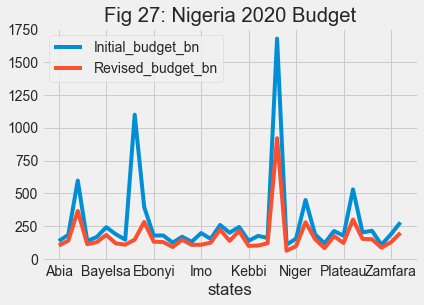

In [206]:
df_ngr_bgt.plot.line( x='states', y = ['Initial_budget_bn', 'Revised_budget_bn'], title = 'Fig 27: Nigeria 2020 Budget', stacked = False)

<AxesSubplot:title={'center':'Fig 28: Nigeria 2020 Budget Percent Change'}, xlabel='states'>

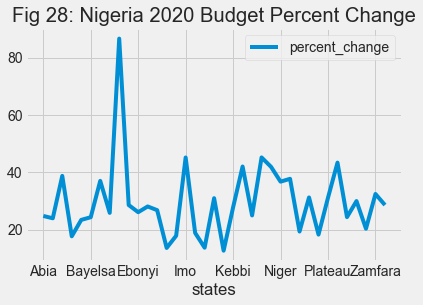

In [208]:
df_ngr_bgt.plot.line( x='states', y = ['percent_change'], title = 'Fig 28: Nigeria 2020 Budget Percent Change', stacked = False)

### Plot Top and Bottom 10 states Budgets cuts

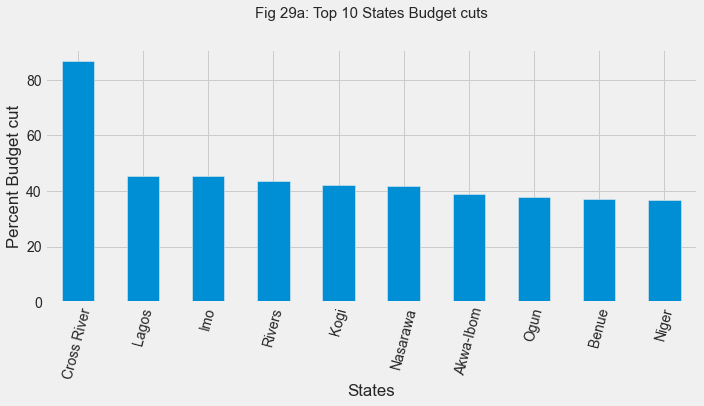

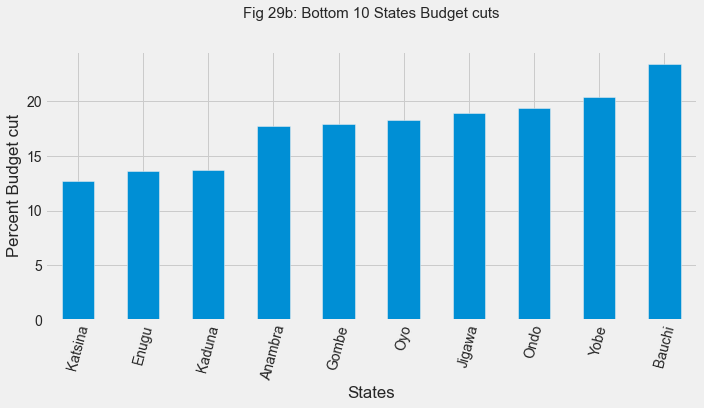

In [217]:



# To sort the grouped data  by budget cuts per state in descending order
df_sorted = df_ngr_bgt.groupby('states')['percent_change'].sum().sort_values(ascending=False)

# Get the top 10 states
top_10 = df_sorted.head(10)

# Plotting top 10 states by change of budgets
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Percent Budget cut')
plt.title('Fig 29a: Top 10 States Budget cuts', fontsize=15, y=1.1)
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()




# To sort the grouped data by budget cuts per state in asscending order
df_sorted = df_ngr_bgt.groupby('states')['percent_change'].sum().sort_values(ascending=True)

# Get the top 10 states
bottom_10 = df_sorted.head(10)

# Plotting top 10 states by change of budgets
plt.figure(figsize=(10, 6))
ax = bottom_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Percent Budget cut')
plt.title('Fig 29b: Bottom 10 States Budget cuts', fontsize=15, y=1.1)
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()



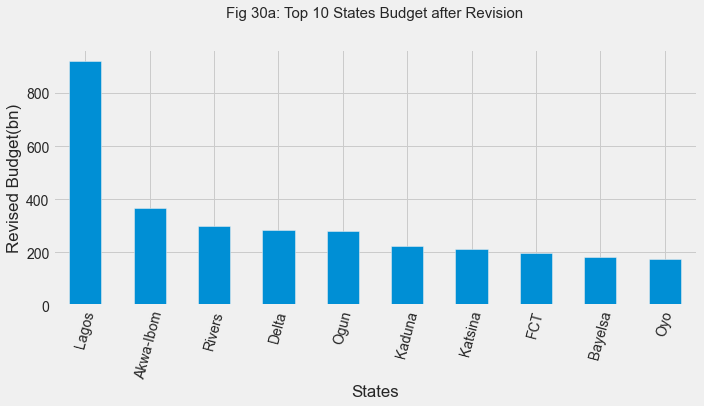

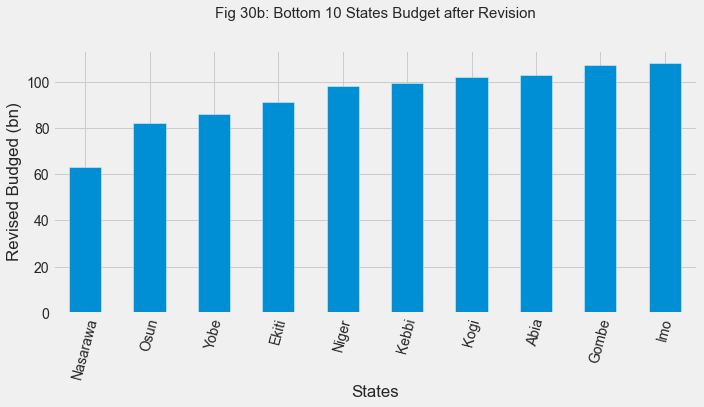

In [265]:



# To sort the grouped data  by budget cuts per state in descending order
df_sorted = df_ngr_bgt.groupby('states')['Revised_budget_bn'].sum().sort_values(ascending=False)

# Get the top 10 states
top_10 = df_sorted.head(10)

# Plotting top 10 states by Revised Budgets
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Revised Budget(bn)')
plt.title('Fig 30a: Top 10 States Budget after Revision', fontsize=15, y=1.1)
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()




# To sort the grouped data by Revised budget per state in asscending order
df_sorted = df_ngr_bgt.groupby('states')['Revised_budget_bn'].sum().sort_values(ascending=True)

# Get the top 10 states
bottom_10 = df_sorted.head(10)

# Plotting top 10 states by change of budgets
plt.figure(figsize=(10, 6))
ax = bottom_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Revised Budged (bn)')
plt.title('Fig 30b: Bottom 10 States Budget after Revision', fontsize=15, y=1.1)
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()



In [216]:
df_ngr_bgt.head(40)

,states,Initial_budget_bn,Revised_budget_bn,percent_change
0,Abia,136.60,102.70,24.82
1,Adamawa,183.30,139.31,24.00
2,Akwa-Ibom,597.73,366.00,38.77
3,Anambra,137.10,112.80,17.72
4,Bauchi,167.20,128.00,23.44
5,Bayelsa,242.18,183.15,24.37
6,Benue,189.00,119.00,37.04
7,Borno,146.80,108.80,25.89
8,Cross River,1100.00,147.10,86.63
9,Delta,395.50,282.30,28.62


In [221]:
df_ngr_bgt.describe()

,Initial_budget_bn,Revised_budget_bn,percent_change
count,37.00000,37.000000,37.000000
mean,276.22027,171.092432,29.769189
std,299.37630,142.974439,13.141512
min,108.00000,62.960000,12.700000
25%,152.92000,108.300000,23.440000
50%,183.30000,128.800000,27.830000
75%,242.18000,174.000000,36.770000
max,1680.00000,920.500000,86.630000


* ### Lagos Had the Highest Budget of 920.5bn while Nassarawa had the lowest budget of 86.63bn, a difference of over 1000%
* ### Cross Rivers had the highest budget cut of 86.63% from 1,100bn to 147.10bn while Katsina had the lowest budget cut of 12.7% from 244bn to 213bn

## Section 5 - ANALYSING GLOBAL GDP TRENDS BEFORE AND AFTER YEAR 2020

* ### Read in Nigeria Budget provided in project folder
* ### Read in the 2017 to 2023 GDP (2023 is based on projection) - For sources, see Excel file 'Global_GDP_2017-2023 full list'

In [247]:
df_ngr_realgdp = pd.read_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\Ngr_realGDP_2014_2020.csv');

In [225]:
df_global_gdp = pd.read_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\Global_GDP_2017_2023_redo.csv')

In [248]:
df_ngr_realgdp.head(10)

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,NaN


In [243]:
df_global_gdp.head(2)

,Country,Continent,Year,GDP
0,United States,North America,2018,20494.10
1,United States,North America,2019,21433.23


* ### Extract Nigeria Budget from global Budget

In [239]:
df_glob_ngrgdp = df_global_gdp.groupby(['Country']).get_group("Nigeria")

In [241]:
df_glob_ngrgdp.head(10)

,Country,Continent,Year,GDP
138,Nigeria,Africa,2018,397.270
139,Nigeria,Africa,2019,448.120
140,Nigeria,Africa,2020,429.423
141,Nigeria,Africa,2021,430.923
142,Nigeria,Africa,2022,477.386
143,Nigeria,Africa,2023,506.601


<AxesSubplot:title={'center':'Fig 31: Nigeria RealGDP, 2014 - 2020'}, xlabel='Year'>

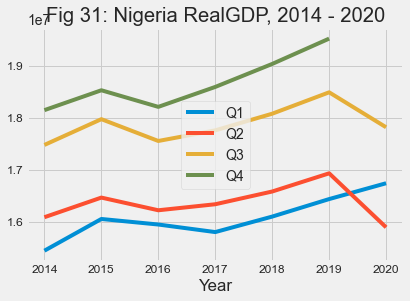

In [258]:
df_ngr_realgdp.plot.line( x='Year', y =  ['Q1', 'Q2', 'Q3', 'Q4'], title = 'Fig 31: Nigeria RealGDP, 2014 - 2020', fontsize=12, stacked = False)

<AxesSubplot:title={'center':'Fig 32: Nigeria Global GDP, 2018 - 2023 ($bill)'}, xlabel='Year'>

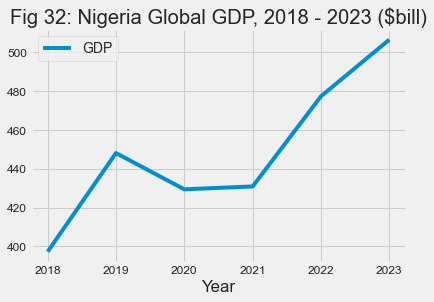

In [263]:
df_glob_ngrgdp.plot.line( x='Year', y =  ['GDP'], title = 'Fig 32: Nigeria Global GDP, 2018 - 2023 ($bill)', fontsize=12, stacked = False)

### Based on the GDP analysis:
* ### The Real Nigeria GDP shows that the economic impact was mostly in the Q2 when lockdown began, Q3 show increased GDP from Q2 although less than 2019
* ### The Nigeria RealGDP trend dipped also in 2016
* ### the Nigeria GDP from global records, shows significan dip; however, thid dip is less than 2018
* ### The GDP increased slightly in 2021 and gained momemtum in 2022

## SECTION 6: NIGERIA RECORD FOR CASES PER STATE


In [284]:
df_ngr_covid_cnt = pd.read_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\ngr_covid19_cases_by_states_edt.csv')

In [285]:
df_ngr_covid_cnt.head(3)

,States,Confirmed,Quarantined,Recovered,Death
0,Lagos,104286,1143,102372,771
1,FCT,29535,9,29277,249
2,Rivers,18112,-3,17960,155


In [286]:
df_ngr_covid_cnt.sum()

States         LagosFCTRiversKadunaPlateauOyoEdoDeltaOgunKano...
Confirmed                                                 266675
Quarantined                                                 3567
Recovered                                                 259953
Death                                                       3155
dtype: object

<AxesSubplot:title={'center':'Fig 33b: Nigeria Covid Cases'}, xlabel='States'>

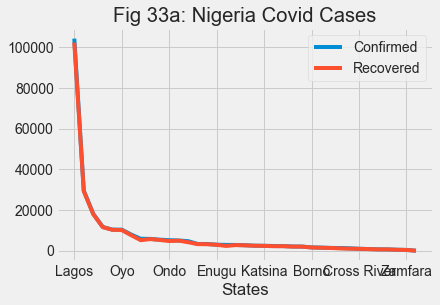

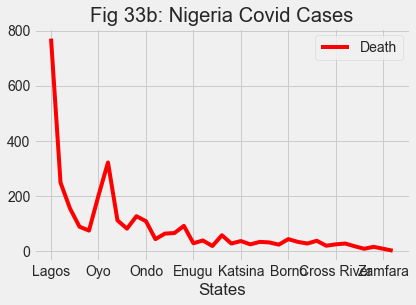

In [295]:
df_ngr_covid_cnt.plot.line( x='States', y = ['Confirmed', 'Recovered'], title = 'Fig 33a: Nigeria Covid Cases', stacked = False)
df_ngr_covid_cnt.plot.line( x='States', y = ['Death'], title = 'Fig 33b: Nigeria Covid Cases', stacked = False, color='red')

### Top 10 and Bottom 10 most impacted States in term of Confirmed Cases and Death Records

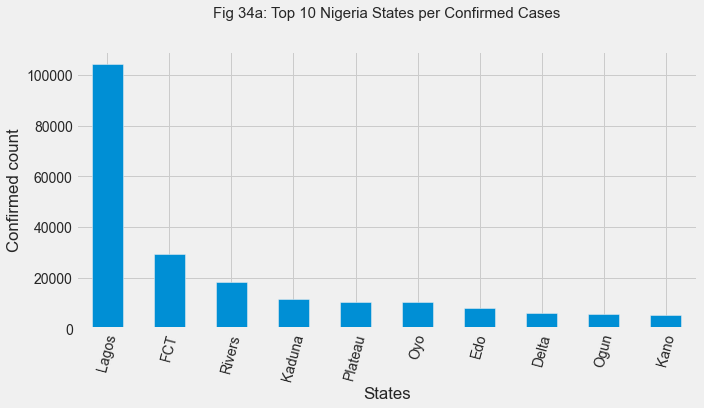

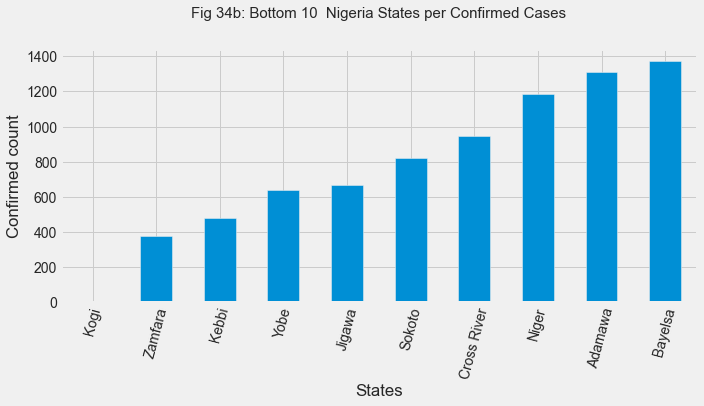

In [290]:
# To sort the grouped data  by confirmed cases in states in descending order
df_sorted = df_ngr_covid_cnt.groupby('States')['Confirmed'].sum().sort_values(ascending=False)

# Get the top 10 states
top_10 = df_sorted.head(10)

# Plotting top 10 states by change of cases
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Confirmed count')
plt.title('Fig 34a: Top 10 Nigeria States per Confirmed Cases', fontsize=15, y=1.1)
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()




# To sort the grouped data by budget cuts per state in asscending order
df_sorted = df_ngr_covid_cnt.groupby('States')['Confirmed'].sum().sort_values(ascending=True)

# Get the top 10 states
bottom_10 = df_sorted.head(10)

# Plotting top 10 states by change of cases
plt.figure(figsize=(10, 6))
ax = bottom_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Confirmed count')
plt.title('Fig 34b: Bottom 10  Nigeria States per Confirmed Cases', fontsize=15, y=1.1)
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()



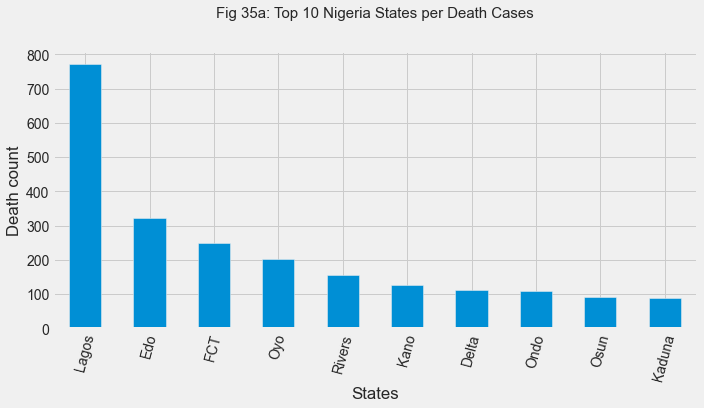

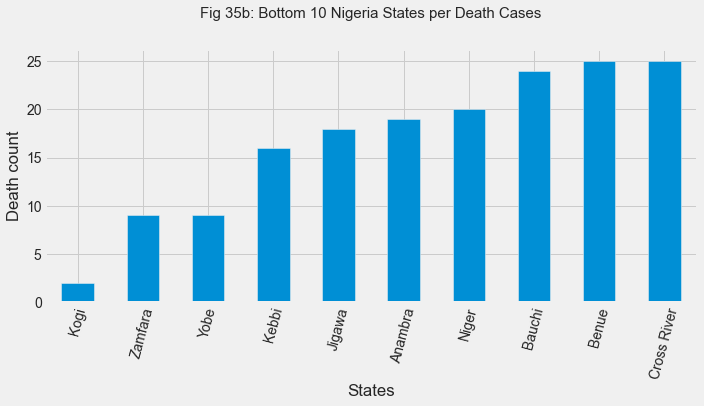

In [291]:
# To sort the grouped data  by confirmed cases in states in descending order
df_sorted = df_ngr_covid_cnt.groupby('States')['Death'].sum().sort_values(ascending=False)

# Get the top 10 states
top_10 = df_sorted.head(10)

# Plotting top 10 states by change of cases
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Death count')
plt.title('Fig 35a: Top 10 Nigeria States per Death Cases', fontsize=15, y=1.1)
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()




# To sort the grouped data by budget cuts per state in asscending order
df_sorted = df_ngr_covid_cnt.groupby('States')['Death'].sum().sort_values(ascending=True)

# Get the top 10 states
bottom_10 = df_sorted.head(10)

# Plotting top 10 states by change of cases
plt.figure(figsize=(10, 6))
ax = bottom_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Death count')
plt.title('Fig 35b: Bottom 10 Nigeria States per Death Cases', fontsize=15, y=1.1)
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()



* ### Lagos State had the highest cases and highest death record (less than 800 people)
* ### Kogi State had the lowest recorded / confirmed cases and also lowest death cases of zero (0) and two (2) respectively
* ### The trend of the confirmed to recovered cases per state are almost on same level. This indicates good medical reaction or possible difference of reaction from improved immunity
* ### Total recorded death cases of 3,155 is same with WHO record

## SECTION 7: Africa+CCVI+methodology VULNERABILITY INDEX

In [296]:
pwd

'C:\\Users\\Admin\\Documents\\Capstone_Project'

In [297]:
df_ccvi = pd.read_csv('C:\\Users\\Admin\\Documents\\Capstone_Project\\covid_external_ngr.csv')

In [298]:
df_ccvi

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


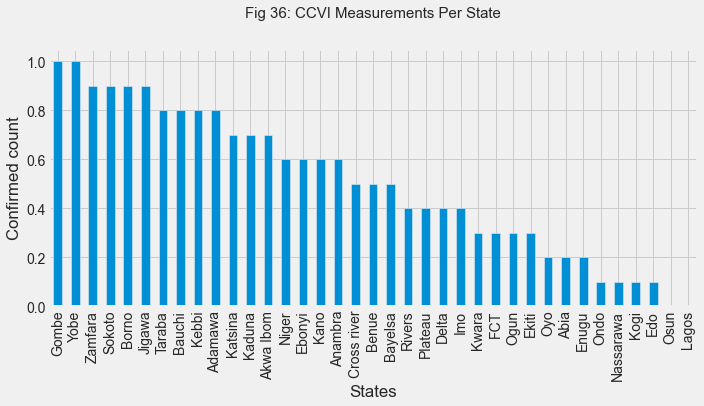

In [300]:
# To sort the grouped data  by confirmed cases in states in descending order
df_sorted = df_ccvi.groupby('states')['Overall CCVI Index'].sum().sort_values(ascending=False)

# Get the top 10 states
top_10 = df_sorted.head(37)

# Plotting top 10 states by change of cases
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Confirmed count')
plt.title('Fig 36: CCVI Measurements Per State', fontsize=15, y=1.1)
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


#### Based on the analysis on the file 'Africa+CCVI+methodology' in the project folder, 
* ### Vulnerability refers to th impact of the virus on the  Community AFTER arrival (pg2)
* ### Maximum impact measure per year was in 2021 with a death rate of about 0.00075% for a 230M population measure
* ### Maximum impact per year 
* ### Impactation records appear higher in more urban states (Fig 34 and 35)
* ### The CCVI overall impact score shows high impact on States with non viral cases while the highest record has the lowest CCVI score. This appears to indicate that CCVI impact in Nigeria is quite negligible

## SECTION 8: SUMMARY

### In summary
* ### about 10 percent of the global population was confirmed to be infected by covid-19 virus
* ### About 0.9 percent of the global population were recorded dead from the covid-19 infection
* ### Nigeria had a total of about 3,160 death cases representing about 0.001 percent of the total population
* ### The Nigeria budget for 2020 was reduced from between about 13 to 90 percent across states
* ### USA had the highest count for covid-19 confirmed and death cases
* ### Nigeria GDP suffered some drop in 2020 which can be associated in part with covid-19 in the 2020 Q2 report due to global trade slowdown. GDP rose through consecutive years.